# Сборный проект - 1. Описание проекта.



Заказчик этого исследования — Министерство культуры Российской Федерации. 

Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю. 

Мы работаем  с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

# Описание данных



Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 

- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 


Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.

- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

In [1]:
#Импортируем библиотеки
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

## Исследование данных о российском кинопрокате

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [2]:
#Откроем mkrf_movies и покажем первые 5 строк
movies = pd.read_csv('mkrf_movies.csv', sep = ',')
pd.set_option('display.max_columns', None)
#Чтобы показывала все столбы
print(display(movies.head(5)))
                          
print('Количество строк:' , movies.shape[0])
#По информации заранее заметила, что есть объект "нет" 

print(display(movies.loc[movies['puNumber'] == 'нет'])) 

print(movies.info())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


None
Количество строк: 7486


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtyp

Примечание: Замечано в столбце puNumber тип "object", а так же строка 1797 с наименованием 'нет'. Всего количество строк 7486.

In [3]:
#Решаю заменить значение пока на '0'
for i in movies.loc[movies['puNumber'].notna(), 'puNumber'].unique():
    movies['puNumber'].replace({i: i.replace('нет', '0')}, inplace=True)

In [4]:
#Откроем mkrf_shows и покажем первые 5 строк
shows = pd.read_csv('mkrf_shows.csv', sep = ',')
pd.set_option('display.max_columns', None)
print(display(shows.head(5)))

print('Количество строк:' , shows.shape[0])
print(shows.info())

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


None
Количество строк: 3158
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
None


Примечание: Так как в таблицах есть общий столбец с номером удостоверения (puNumber), то объядинять логично по нему. Замечано, что у них разное кол-во строк. Значит объединять нужно с помощью метода merge() по left (В условии сказано, чтобы сохранились данные из первой таблицы).

In [5]:
#Приведем в единому типу столбец puNumber в обоих таблицах
movies['puNumber'] = movies['puNumber'].astype('int')

In [6]:
data = movies.merge(shows, on='puNumber', how='left')
print(display(data.head(5)))
print('Количество строк:' , data.shape[0])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


None
Количество строк: 7486


# Вывод:
Мы объединили две таблицы (mkrf_movies,mkrf_shows) по столбцу puNumber. При этом обнаружив, что тип данных в таблице mkrf_movies столбца был 'object', что является не логичным, так как номер удоставерения - это число (int). После попытки преобразования типа, выявили, что в строке 1797 указано слово 'нет'. Взяли на себя ответственность и заменили его на 0. Следующим шагом объединили две таблицы в одну, сохранив количество строк в точности, как в таблице mkrf_movies. 

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [7]:
#Посмотри ещё раз общую информацию по таблице
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Столбы в которых нужно изменить тип:
- show_start_date — дата премьеры фильма;
- ratings — рейтинг фильма на КиноПоиске.

In [8]:
# формат даты передадим методу to_datetime с помощью параметра format.
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
display(data.head(5))

#Несовсем понимаю зачем там ещё +00:00

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [9]:
#Преобразуем ratings  в float c помощью проверки 
display(data['ratings'].unique())

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Обнаружено неверное занесение данных в таблицу. Нужно сначала их преобразовать. (99%, 28%, 97%, 83%', '64%', '91%', '94%', '62%', '79%', '90%','19%', '88%', '98%) 

In [10]:
#print('\n','Количество неожидаемых значений рейтинга (со знаком процента):', data['ratings'].query('ratings.str.count("%") == True').shape[0]
    

In [11]:
data.loc[(data.ratings.str.contains('%')) & (data.ratings.notna()), 'ratings'] = np.NaN
#pd.to_numeric(data['ratings'], errors='ignore')
#data['ratings'] = data['ratings'].replace('??', np.NaN).astype('float')
#for i in data.loc[data['ratings'].notna(), 'ratings'].unique():
    #data['ratings'].replace({i: i.replace('%', '')}, inplace=True)
    #data['ratings'].replace({i: i.replace(',', '.')}, inplace=True)

Сомневалась на счёт %, так как это возможно неправильно понятые значения записанным или фильмы которые ещё не вышли в прокат 

In [12]:
display(data['ratings'].unique())

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '1.0',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

In [13]:
data['ratings'] = data['ratings'].astype(float)
#В принципе задание выполнила, но целые чила >10 нужно точно разделить на 10 (Додуматься бы как)
#for i in data.loc[data['ratings'].notna(), 'ratings'].unique():
    #if i > 10:
      #Перезаписать в строке с типом float
    

Вывод: Изменен тип времени в столбце и приведены к числовому типу рейтинг

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

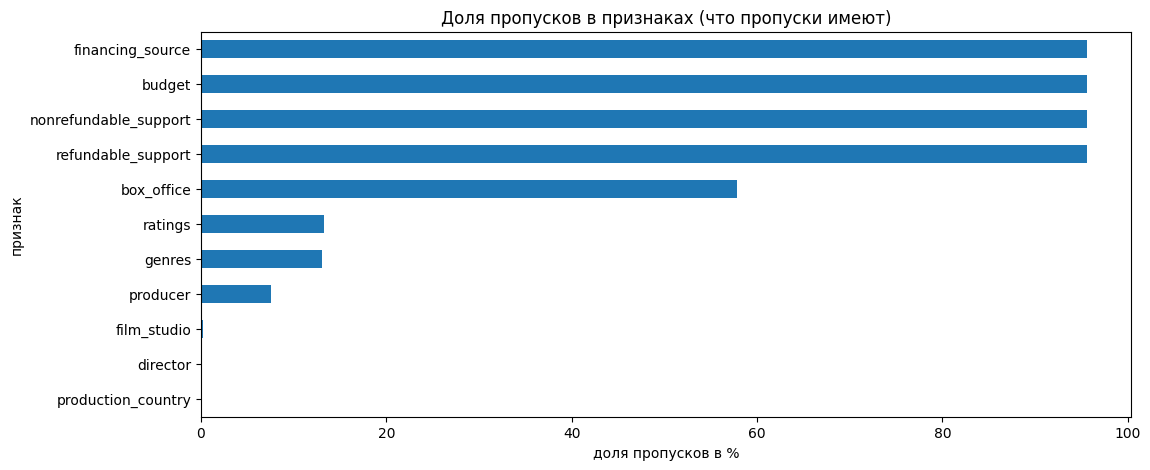

In [14]:
#Построим диаграмму с пропусками 
fig, ax = plt.subplots(figsize=(12, 5))
(
    (data.isna().mean() * 100)
    .to_frame()
    .rename(columns={0: 'space'})
    .query('space > 0')
    .sort_values('space')
    .plot(kind='barh', legend=False, ax=ax)
)
ax.set(title='Доля пропусков в признаках (что пропуски имеют)', xlabel='доля пропусков в %', ylabel='признак');

> боле 90% пропусков в столбах:
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма.

Думаю, что заполнять средним или медианным в таком случае некорректно. Скорее всего для многих фильмов вообще не известна государственная поддержка в связи с коммерческой тайной.


> <60% пропусков в столбце box_office — сборы в рублях. Думаю, что заполнять средним или медианным в таком случае некорректно. У каждого фильма возможны разные сборы. И слишком большое кол-во пропусков, лучше запросить информацию.


> <18% пропусков в столбцах:
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма;
- producer — продюсер;

Категориальные данные можно заполнить отдельным назнвание UNKNOWN. 
Все столбы, что меньше 1 процента я заполню в ручную.

In [15]:
data[data['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [16]:
data.loc[data['puNumber']==111001216, 'production_country'] = "СССР, Россия"
data.loc[data['puNumber']==214000410, 'production_country'] = "Россия"

Замена пропусков film_studio и director

In [17]:
data['film_studio'] = data['film_studio'].fillna('не указано')
data['director'] = data['director'].fillna('не указано')

Замена пропусков в столбцах гос. поддержки 

In [18]:
fillna_list = ['refundable_support', 'nonrefundable_support']
data[fillna_list] = data[fillna_list].fillna(0)

data['financing_source'] = data['financing_source'].fillna('без господдержки')

In [19]:

data['genres'] = data['genres'].fillna('не указано')
data['producer'] = data['producer'].fillna('не указано')

In [20]:
print(data.isna().sum().sort_values())
data.isnull().sum().sort_values()/data.shape[0]*100

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
financing_source            0
genres                      0
ratings                   996
box_office               4328
budget                   7154
dtype: int64


title                     0.000000
puNumber                  0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.000000
production_country        0.000000
director                  0.000000
producer                  0.000000
age_restriction           0.000000
refundable_support        0.000000
nonrefundable_support     0.000000
financing_source          0.000000
genres                    0.000000
ratings                  13.304836
box_office               57.814587
budget                   95.565055
dtype: float64

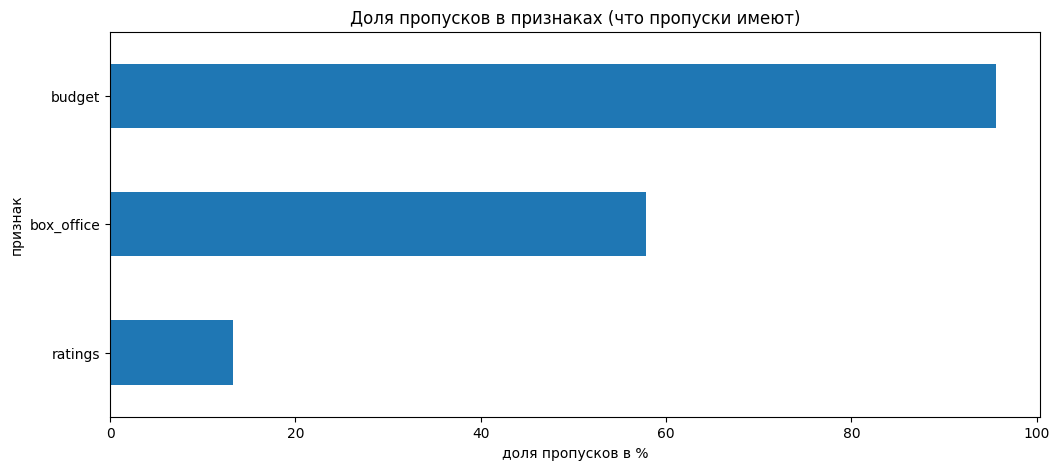

In [21]:
fig, ax = plt.subplots(figsize=(12, 5))
(
    (data.isna().mean() * 100)
    .to_frame()
    .rename(columns={0: 'space'})
    .query('space > 0')
    .sort_values('space')
    .plot(kind='barh', legend=False, ax=ax)
)
ax.set(title='Доля пропусков в признаках (что пропуски имеют)', xlabel='доля пропусков в %', ylabel='признак');

Остались пропуски только в двух столбах. Их тоже можно было заполнить на 'неизвестно', но с деньгами шуткии плохи. Оставим.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [22]:
print(data[data.duplicated(['title', 'type', 'show_start_date','production_country'])].count())
print(display(data[data.duplicated(['title', 'type', 'show_start_date','production_country'])]))
data = data.drop_duplicates(['title', 'type', 'show_start_date','production_country'])
print(data[data.duplicated(['title', 'type', 'show_start_date','production_country'])].count())
#Проверим есть ли явные дубликаты в таблице
print(data.duplicated().sum())

title                    8
puNumber                 8
show_start_date          8
type                     8
film_studio              8
production_country       8
director                 8
producer                 8
age_restriction          8
refundable_support       8
nonrefundable_support    8
budget                   0
financing_source         8
ratings                  7
genres                   8
box_office               3
dtype: int64


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1301,Эпидемия_,221035513,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,7.2,"драма,фантастика,триллер",NaN
1476,Оторвы,221013214,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,3.5,"комедия,приключения",NaN
2192,Последние пять лет.,121005715,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,5.7,"мюзикл,драма,мелодрама",52495.0
2753,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.0,0.0,NaN,без господдержки,5.2,"мультфильм,семейный,спорт",14152495.9
3087,Анархисты,121002316,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,5.7,драма,332371.0
4043,Бугай,124001210,2010-09-24 12:00:00+00:00,Анимационный,"Иллюзион Студиос, Процесо",Мексика-Аргентина,Густаво Кова,"Хуго Е. Лаура, Хосе Луис Масса",«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,6.6,"мультфильм,боевик,триллер",NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,не указано,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0.0,0.0,NaN,без господдержки,NaN,не указано,NaN
6429,Зоя,111022718,2018-11-25 12:00:00+00:00,Художественный,Тарханова Юлия Олеговна,Россия,О.Товма,Ю.Тарханова,«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,3.9,"история,биография,военный",NaN


None
title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64
0


In [23]:
data['title'] = data['title'].str.replace('.', ' ')
data['title'] = data['title'].str.replace('_', ' ')
data['title'] = data['title'].str.replace('  ', ' ')    # замена двух последовательных пробелов на один
data['title'] = data['title'].str.replace('  ', ' ')    # еще раз для гарантии
data['title'] = data['title'].str.strip()
data.loc[data['budget'] == 0, 'budget'] = np.NaN

C:\Users\Admin\AppData\Local\Temp\ipykernel_30076\43067520.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['title'] = data['title'].str.replace('.', ' ')


Явных дубликатов таблицы не было. Но были неявлые по столбам дубликаты. Удалили, чтобы не мешали и не двоими в анализе.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [24]:
for i in range(len(data.dtypes)):
    if data.dtypes[i] == 'object':
        display(data[data.columns[i]].value_counts().to_frame().reset_index().sample(3))

for i in range(len(data.dtypes)):
        if data.dtypes[i] == 'object':
            data[data.columns[i]] = data[data.columns[i]].str.lower()            # перевод значений в нижний регистр
            data[data.columns[i]] = data[data.columns[i]].str.replace('ё','е')   # замена буквы "ё" на "е"
            data[data.columns[i]] = data[data.columns[i]].str.strip()            # удаление концевых пробелов

,index,title
3599,Пипец 2 /По комиксам Марка Миллара/,1
6416,ГОД ЛИТЕРАТУРЫ,1
6165,С пяти до семи,1


,index,type
6,Анимационный,1
3,Прочие,406
1,Художественный,1388


,index,film_studio
280,"Чернин Интертейнмент, ХХ век Фокс",3
5193,"ООО ""Пан-Атлантик Студио""",1
5377,"ООО Киностудия ""Чеченфильм""",1


,index,production_country
599,Франция-Польша,1
247,Таиланд - США,2
83,США - Бельгия,4


,index,director
3824,хореограф Кеннет Макмиллан,1
4017,Сильви Веред,1
1007,А.Миндадзе,2


,index,producer
401,"Рональд Булард, Джил Кэйтс младший, Марк Халм",2
4301,"Элизабет Бэйкер, Кайл Кернан",1
4045,"Чжан Вэйпин, Чауинг Денг, Уильям Конг",1


,index,age_restriction
4,«6+» - для детей старше 6 лет,626
1,«18+» - запрещено для детей,1605
3,«0+» - для любой зрительской аудитории,810


,index,financing_source
1,Министерство культуры,164
0,без господдержки,7146
3,"Министерство культуры, Фонд кино",22


,index,genres
50,"мультфильм,фантастика,фэнтези",23
357,"драма,приключения,военный",2
484,"драма,семейный,комедия",1




> Значения многих категориальных полей представляют собой перечисления. Это строки, образованные соединением более коротких строк через разделитель , или -

> В следующих шагах мы сделаем отдельные столбцы по эти данным,где выделим только первое значение.

#### Шаг 2.5. Проверьте количественные значения

Разделим значения для получения миллионов 

In [25]:
import warnings
import matplotlib.ticker as ticker

In [26]:
# стиль графиков

sns.set_style('whitegrid', {'axes.facecolor': '0.98', 'grid.color': '0.9', 'axes.edgecolor': '1.0'})
plot_dpi = 150                                    # dpi для рендеринга графиков
colors = ['darkcyan', 'orange', 'tomato']         # цвета для графиков


# внешний вид

pd.set_option('display.float_format', '{:.3f}'.format)
# pd.set_option('display.precision', 7)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

warnings.filterwarnings('ignore')

In [27]:
# числовые значения для вертикальных bar-графиков
# ! доработать до универсальной (+ горизонтальные, + логарифмические)

def bar_annotate(ax, decimals=0, font_size=10):
    
    max_height = 0
    
    for p in ax.patches:
        if p.get_height() > max_height:
            max_height = p.get_height()
    
    for p in ax.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height() + max_height*0.01
        value = f'{p.get_height():.{decimals}f}'
        ax.text(_x, _y, value, ha="center", fontsize=font_size)
        
# пустые строки для свободного пространства при выводе на экран

def space(num=1):
    print('\n' * num)

**Box_office**

In [28]:
data['box_office'] = data['box_office'] / 1E6
data['budget'] = data['budget'] / 1E6
data['refundable_support'] = data['refundable_support'] / 1E6
data['nonrefundable_support'] = data['nonrefundable_support'] / 1E6
data.loc[data['box_office'] == 0, 'box_office'] = np.NaN

#Долго я просидела с этим. Пока не проанализировала весь столбе box_office,  а там у нас есть 0 из-за которого не выводиться диаграмма. (рука-лицо)

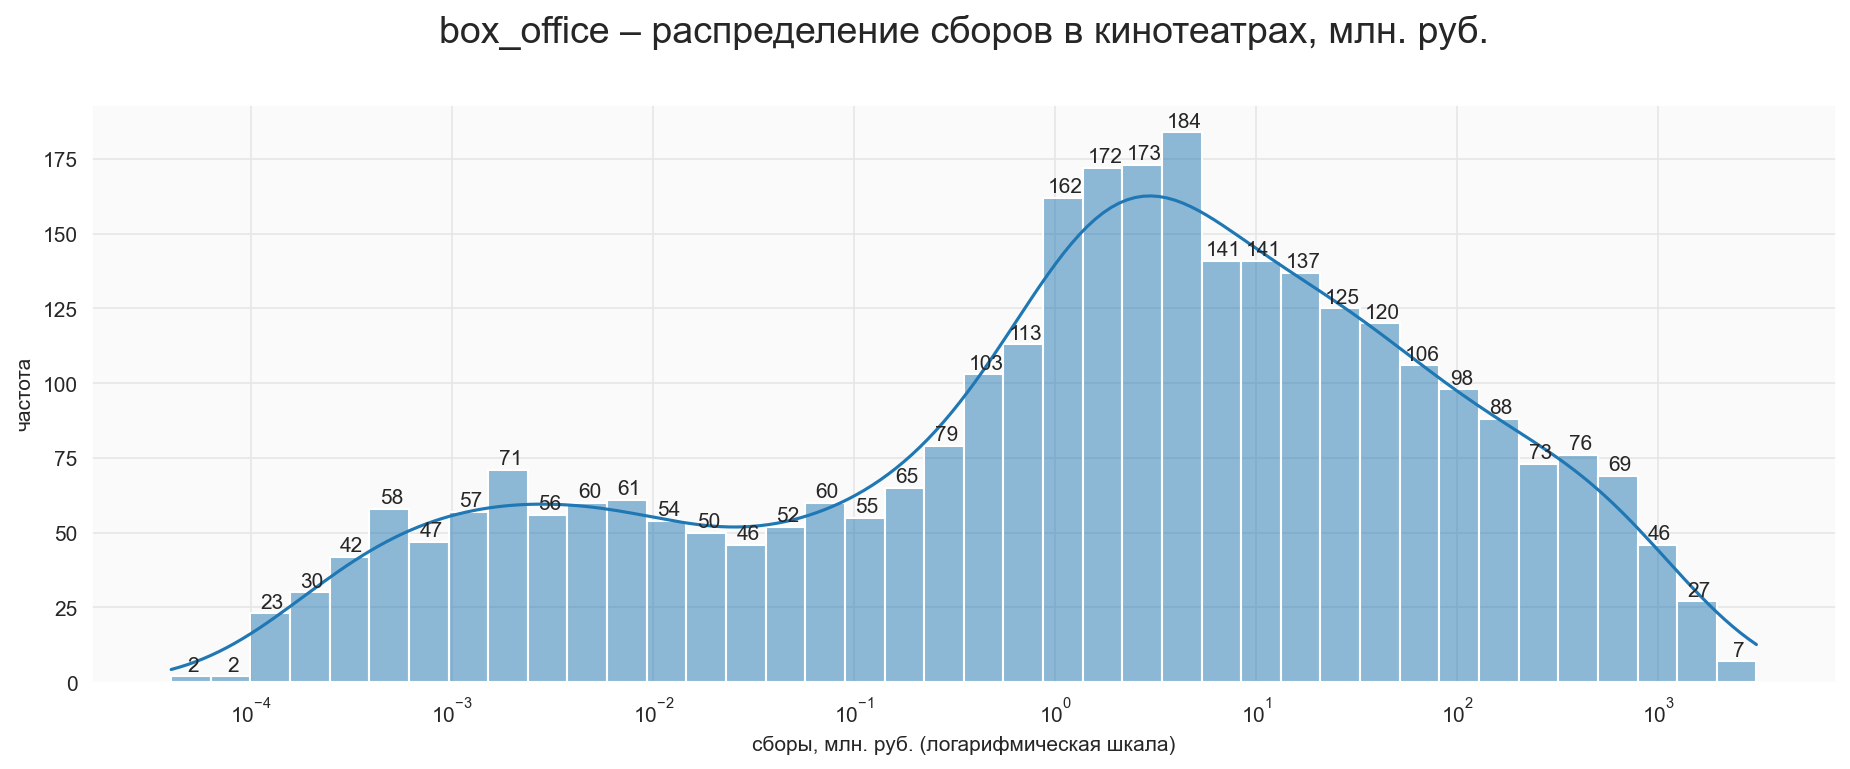

In [29]:
fig, ax = plt.subplots(figsize=(15,5), dpi=plot_dpi)

sns.histplot(
             x=data.box_office,
             bins=40,
             log_scale=True,
             kde=True,
            )

ax.set_title('box_office – распределение сборов в кинотеатрах, млн. руб.', size=18, pad=30)
ax.set_ylabel('частота')
ax.set_xlabel('сборы, млн. руб. (логарифмическая шкала)')

bar_annotate(ax)

space()
plt.show()

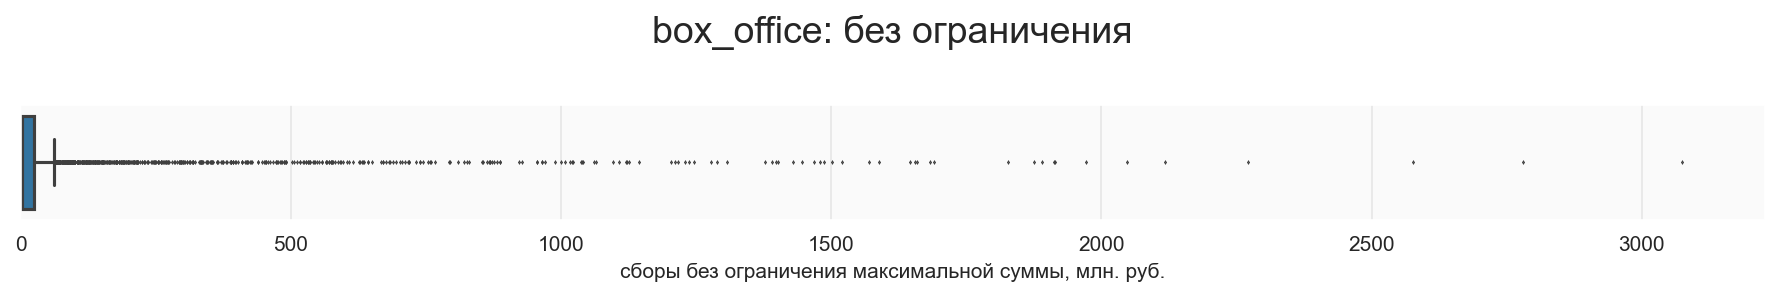

In [30]:
fig, ax = plt.subplots(figsize=(15,1), dpi=plot_dpi)

sns.boxplot(
            x=data['box_office'],
            fliersize=0.3,
           )
ax.set_xlim(0,)
ax.set_title('box_office: без ограничения', size=18, pad=30)
ax.set_xlabel('сборы без ограничения максимальной суммы, млн. руб.')

space()
plt.show()
space()

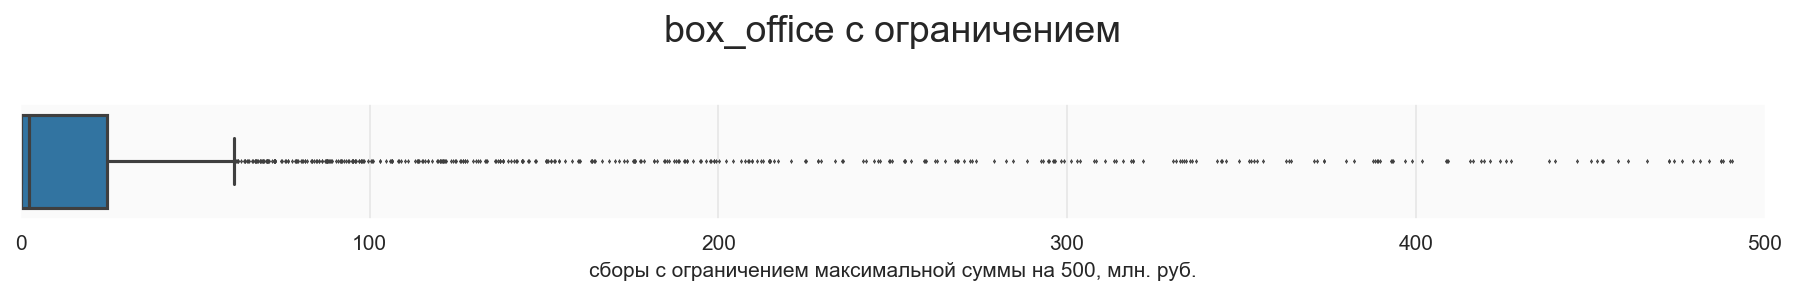

In [31]:
fig, ax = plt.subplots(figsize=(15,1), dpi=plot_dpi)

sns.boxplot(
            x=data['box_office'],
            fliersize=0.3,
           )
ax.set_xlim(0,500)
ax.set_title('box_office с ограничением', size=18, pad=30)
ax.set_xlabel('сборы с ограничением максимальной суммы на 500, млн. руб.')

space()
plt.show()
space()

In [32]:
display(data['box_office'].describe())

count   3131.000
mean      77.134
std      241.283
min        0.000
25%        0.101
50%        2.413
75%       24.638
max     3073.569
Name: box_office, dtype: float64

**Budget**

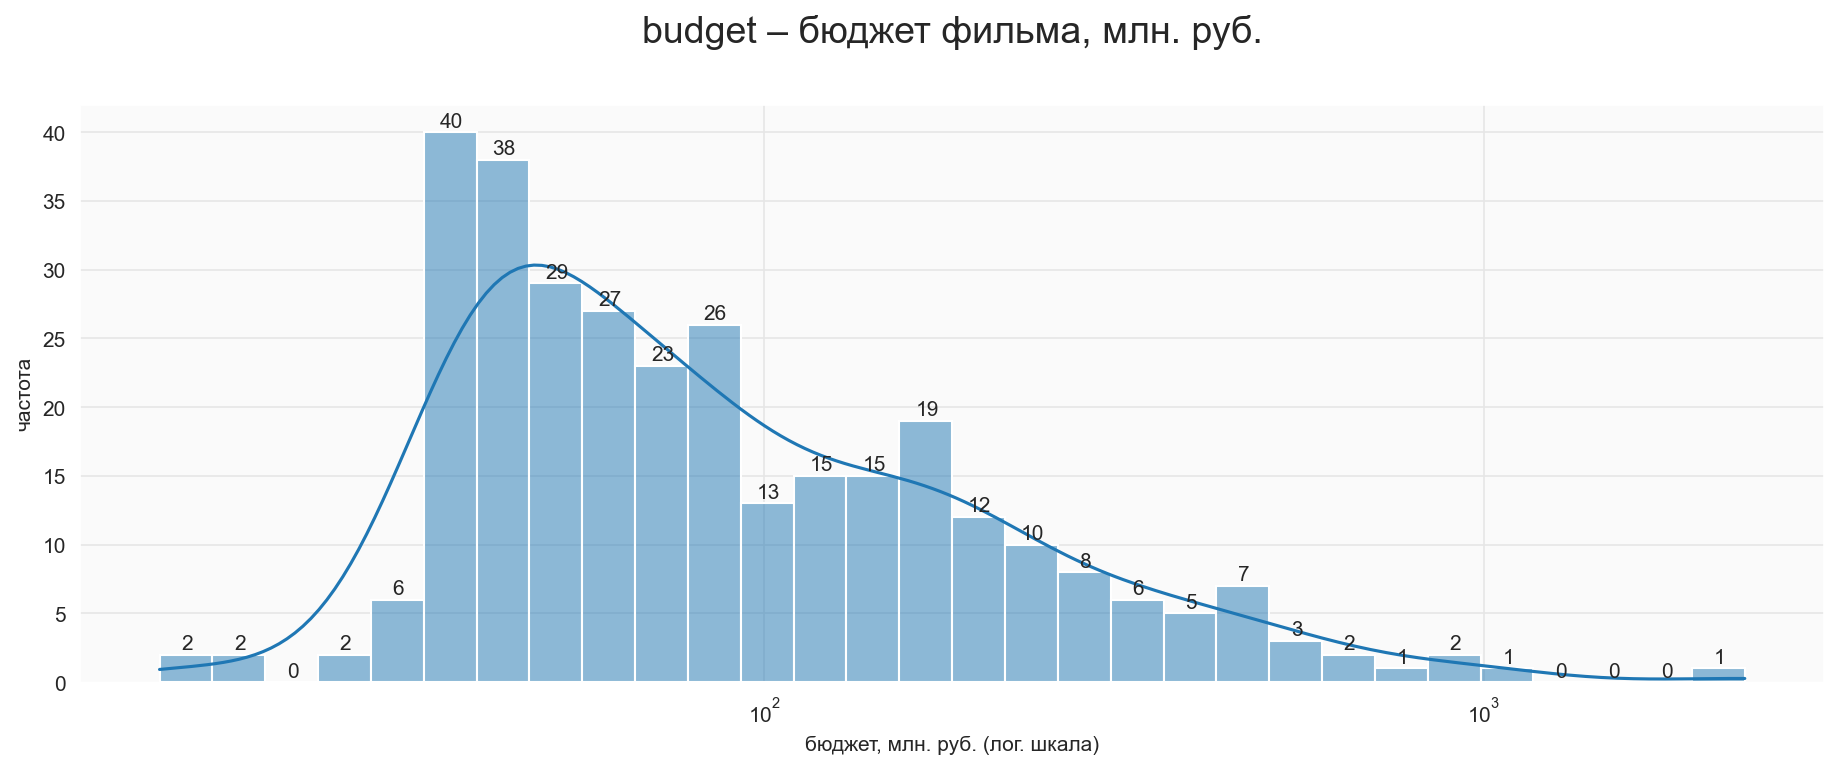

In [33]:
fig, ax = plt.subplots(figsize=(15,5), dpi=plot_dpi)

sns.histplot(
             x=data['budget'],
             bins=30,
             log_scale=True,
             kde=True,
            )

ax.set_title('budget – бюджет фильма, млн. руб.', size=18, pad=30)
ax.set_ylabel('частота')
ax.set_xlabel('бюджет, млн. руб. (лог. шкала)')

bar_annotate(ax)

space()
plt.show()
space()

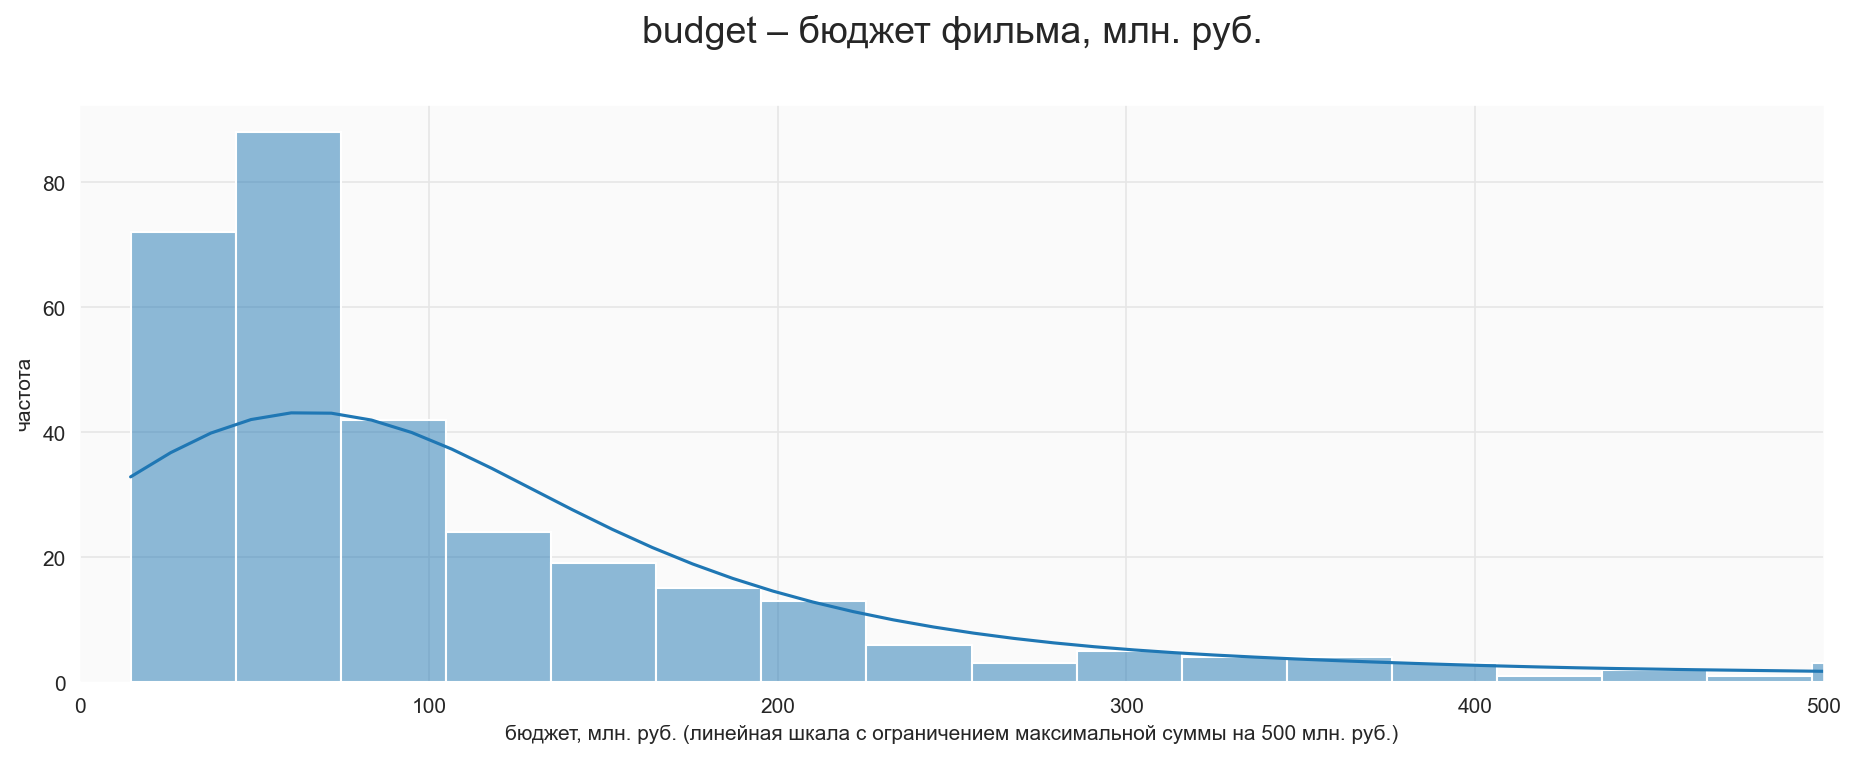

In [34]:
fig, ax = plt.subplots(figsize=(15,5), dpi=plot_dpi)

sns.histplot(
             x=data['budget'],
             kde=True,
            )

ax.set_xlim(0, 500)

ax.set_title('budget – бюджет фильма, млн. руб.', size=18, pad=30)
ax.set_ylabel('частота')
ax.set_xlabel('бюджет, млн. руб. (линейная шкала с ограничением максимальной суммы на 500 млн. руб.)')

space()
plt.show()
space()

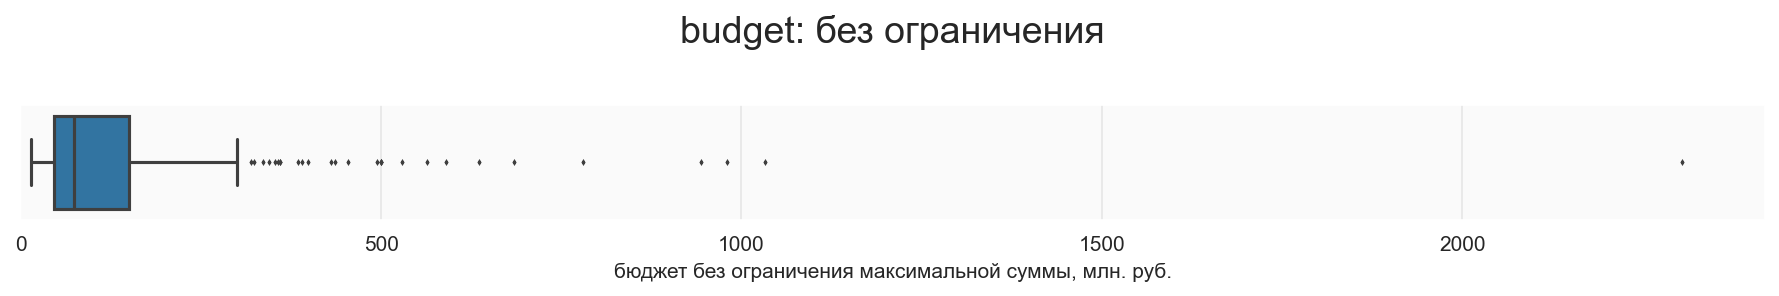

In [35]:
fig, ax = plt.subplots(figsize=(15,1), dpi=plot_dpi)

sns.boxplot(
            x=data['budget'],
            fliersize=1.0,
           )
ax.set_xlim(0,)
ax.set_title('budget: без ограничения', size=18, pad=30)
ax.set_xlabel('бюджет без ограничения максимальной суммы, млн. руб.')

space()
plt.show()

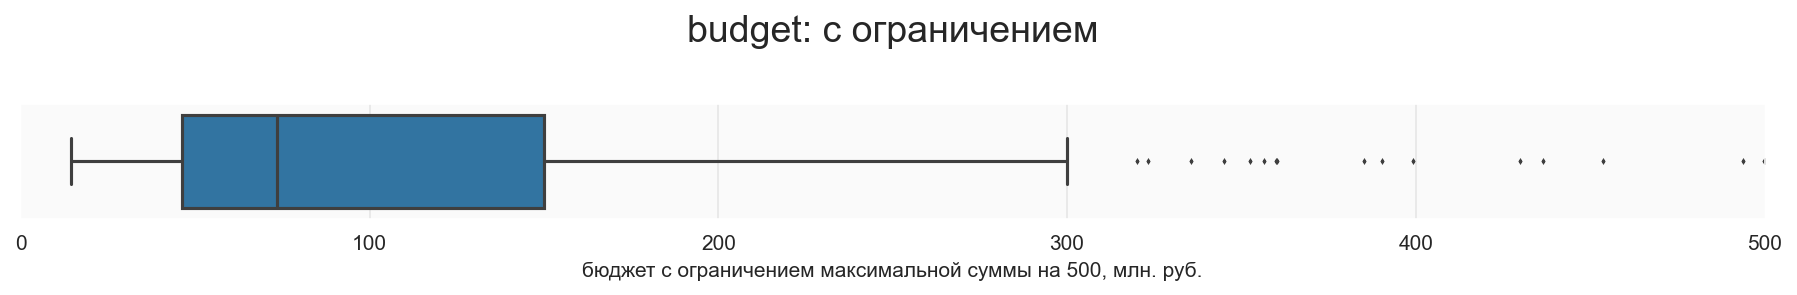

In [36]:
fig, ax = plt.subplots(figsize=(15,1), dpi=plot_dpi)

sns.boxplot(
            x=data['budget'],
            fliersize=1.0,
           )
ax.set_xlim(0, 500)
ax.set_title('budget: с ограничением', size=18, pad=30)
ax.set_xlabel('бюджет с ограничением максимальной суммы на 500, млн. руб.')

space()
plt.show()
space()

In [37]:
data['budget'].describe().to_frame()

,budget
count,315.000
mean,134.096
std,191.226
min,14.462
25%,46.154
50%,73.380
75%,150.004
max,2305.074


In [38]:
#Фильм с макс. бюджетом 

data.query('budget == budget.max()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7114,тайна печати дракона,111012819,2019-09-12 12:00:00+00:00,художественный,"ооо ""кинокомпания ""ств""; ооо ""рфг корп""; ооо ""рфг""; ао ""маринс групп интертеймент""; ооо ""фетисов...",россия-китай,о.степченко,"с.сельянов, а.петрухин",«6+» - для детей старше 6 лет,180.000,90.000,2305.074,фонд кино,5.800,"приключения,фэнтези",333.597


**refundable_support и nonrefundable_support**

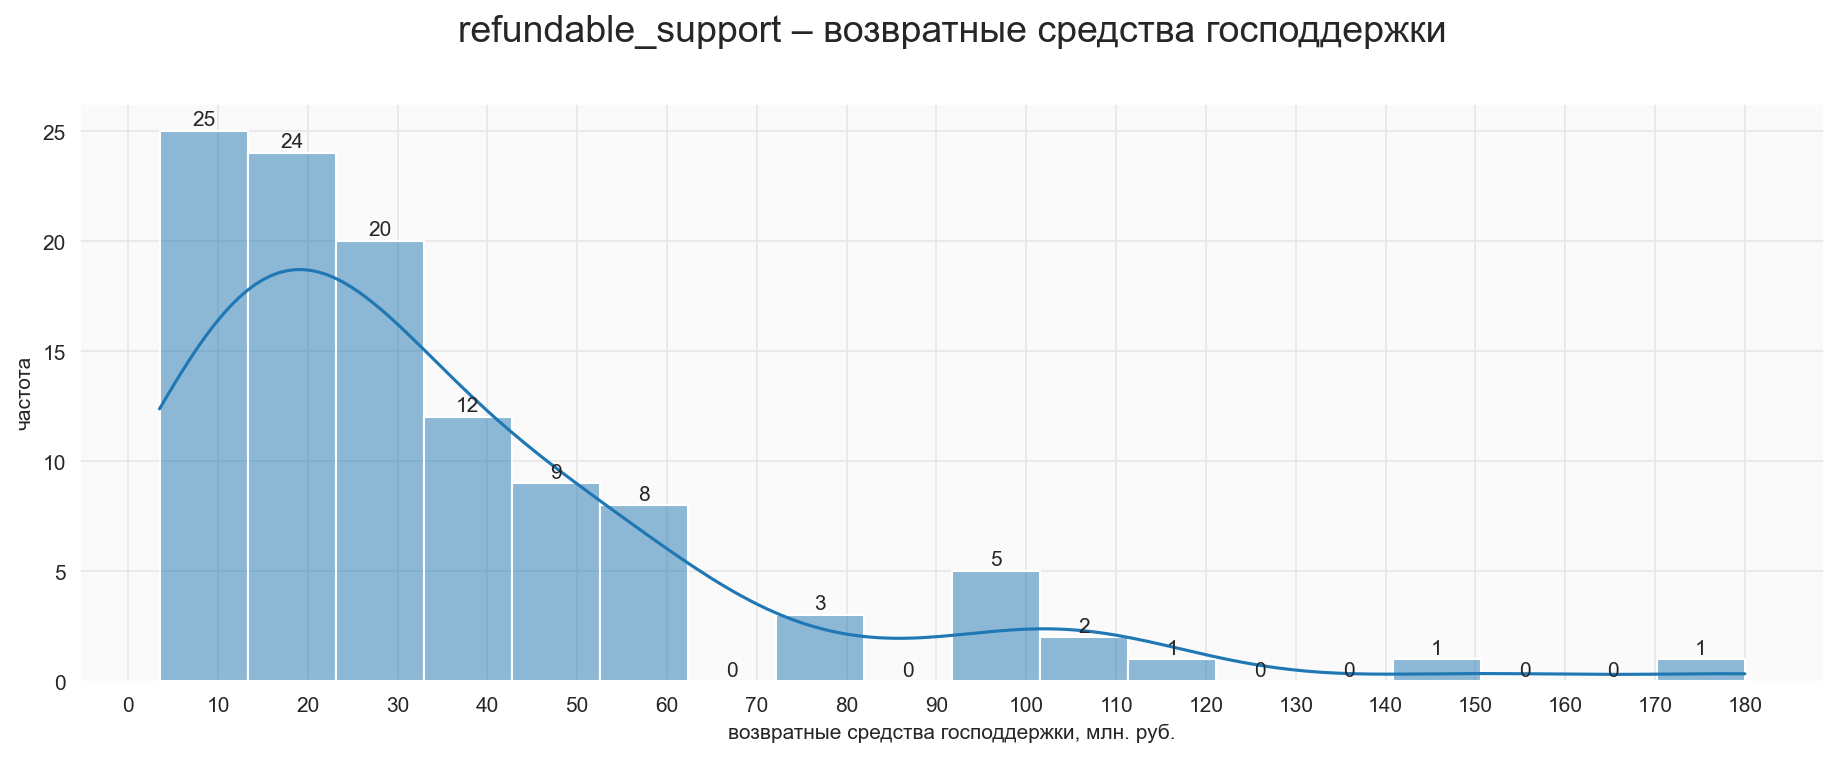

In [39]:
fig, ax = plt.subplots(figsize=(15,5), dpi=plot_dpi)

sns.histplot(
             x=data.query('refundable_support > 0').refundable_support,
             bins=18,
             kde=True,
            )

ax.set_title('refundable_support – возвратные средства господдержки', size=18, pad=30)
ax.set_ylabel('частота')
ax.set_xlabel('возвратные средства господдержки, млн. руб.')

ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

bar_annotate(ax)

space()
plt.show()
space()

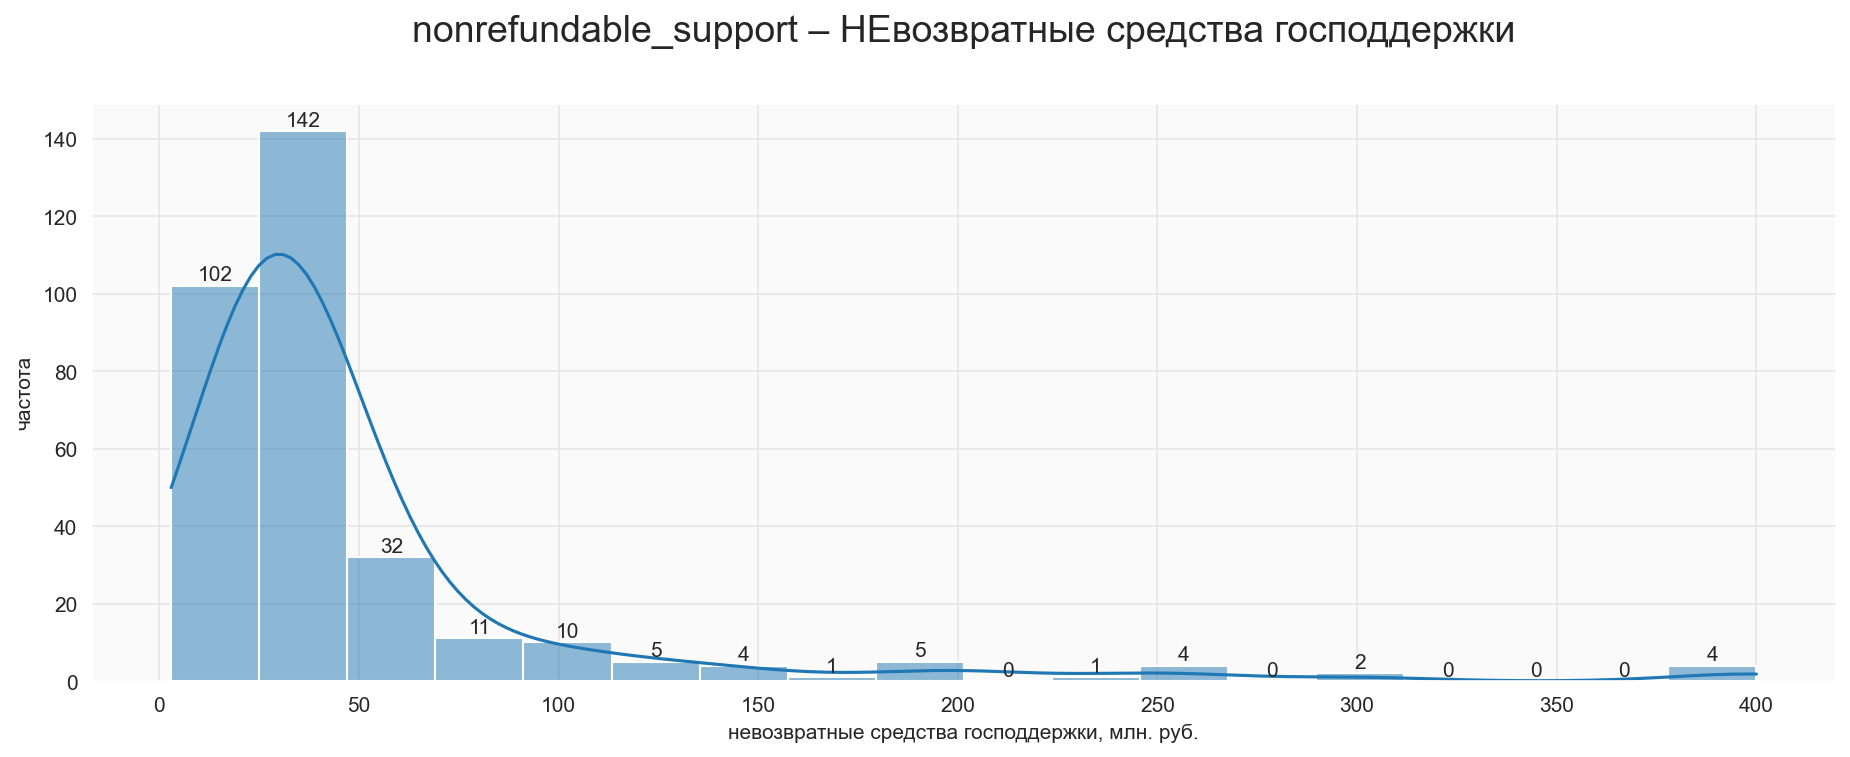

In [40]:
fig, ax = plt.subplots(figsize=(15,5), dpi=plot_dpi)

sns.histplot(
             x=data.query('nonrefundable_support > 0').nonrefundable_support,
             bins=18,
             kde=True,
            )

ax.set_title('nonrefundable_support – НЕвозвратные средства господдержки', size=18, pad=30)
ax.set_ylabel('частота')
ax.set_xlabel('невозвратные средства господдержки, млн. руб.')

bar_annotate(ax)

space()
plt.show()
space()

In [41]:
data.query('nonrefundable_support > 0').nonrefundable_support.describe().to_frame()




,nonrefundable_support
count,323.000
mean,50.346
std,60.243
min,3.000
25%,25.000
50%,30.000
75%,45.000
max,400.000


In [42]:
data.query('refundable_support > 0').refundable_support.describe().to_frame()

,refundable_support
count,111.000
mean,35.486
std,31.973
min,3.500
25%,15.000
50%,25.000
75%,50.000
max,180.000


Суммарный бюджет фильма должен быть не меньше суммарной господдержки фильма.

**ratings (пользовательский рейтинг в "Кинопоиске")**

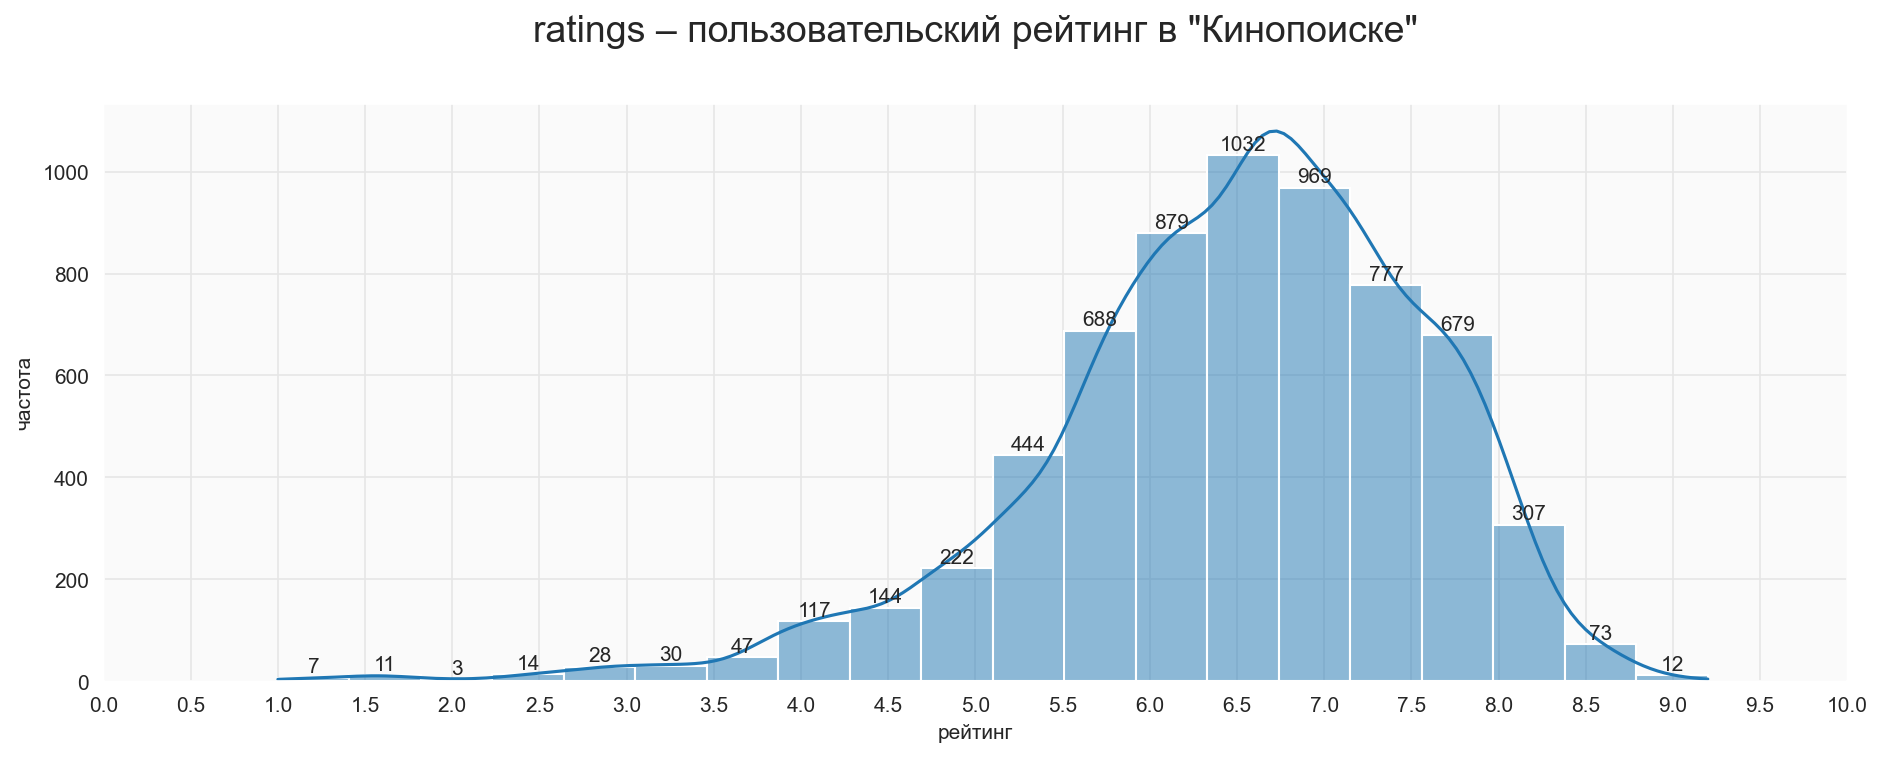

In [43]:
fig, ax = plt.subplots(figsize=(15,5), dpi=plot_dpi)

sns.histplot(
             x=data['ratings'],
             bins=20,
             kde=True,
            )

ax.set_title('ratings – пользовательский рейтинг в "Кинопоиске"', size=18, pad=30)
ax.set_ylabel('частота')
ax.set_xlabel('рейтинг')
ax.set_xlim(0,10)

ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))

bar_annotate(ax)

space()
plt.show()

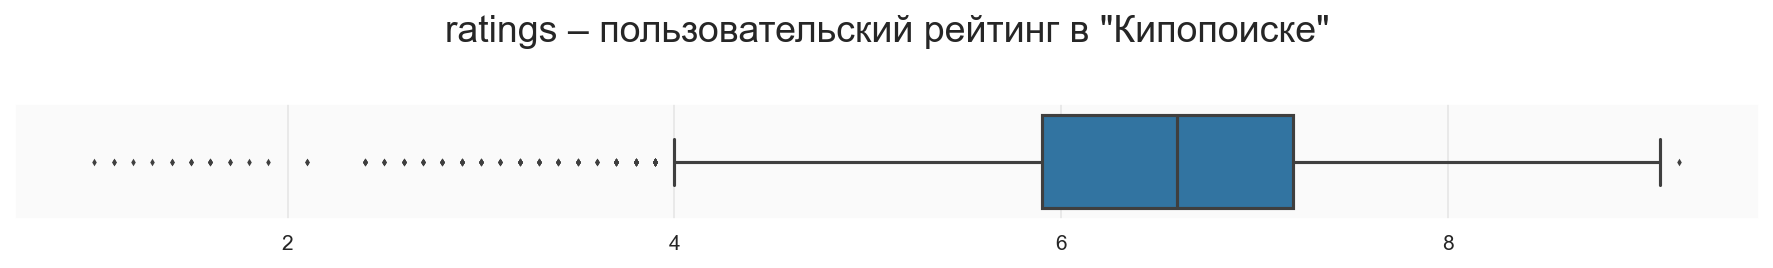

In [44]:
fig, ax = plt.subplots(figsize=(15,1), dpi=plot_dpi)

sns.boxplot(
            x=data['ratings'],
            fliersize=1.2,
           )
ax.set_title('ratings – пользовательский рейтинг в "Кипопоиске"', size=18, pad=30)
ax.set_xlabel('')

space()
plt.show()
space()

Распределение значений рейтинга похоже на нормальное с некоторым смещением вправо.



#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [45]:
data['prokat_year'] = data['show_start_date'].dt.year.astype('int16')
data['director_name'] = data['director'].str.split(',').str[0]

In [46]:
data['genres_main'] = (
                      data
                      .genres
                      .apply(repr)              # преобразование из set в str
                      .str.replace('{','')
                      .str.replace('}','')
                      .str.replace('\'','')
                      .str.replace('\"','')
                      .str.replace('nan','')
                      .str.split(',')
                      .str[0]
                     )

In [47]:
#Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.
data['support_part'] = ((data.refundable_support + data.nonrefundable_support) / data.budget)#.fillna(0)

In [48]:
print(display(data.head(5)))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,prokat_year,director_name,genres_main,support_part
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,0.000,0.000,NaN,без господдержки,7.200,"боевик,драма,мелодрама",NaN,2015,кевин костнер,боевик,NaN
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,не указано,«6+» - для детей старше 6 лет,0.000,0.000,NaN,без господдержки,6.600,"драма,военный",NaN,2016,е.матвеев,драма,NaN
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интерт...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.000,0.000,NaN,без господдержки,6.800,"фантастика,боевик,триллер",NaN,2016,тимур бекмамбетов,фантастика,NaN
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интерт...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.000,0.000,NaN,без господдержки,6.800,"фантастика,боевик,триллер",NaN,2016,тимур бекмамбетов,фантастика,NaN
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интерт...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.000,0.000,NaN,без господдержки,6.800,"фантастика,боевик,триллер",NaN,2015,тимур бекмамбетов,фантастика,NaN


None


Вставлены таблицы.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

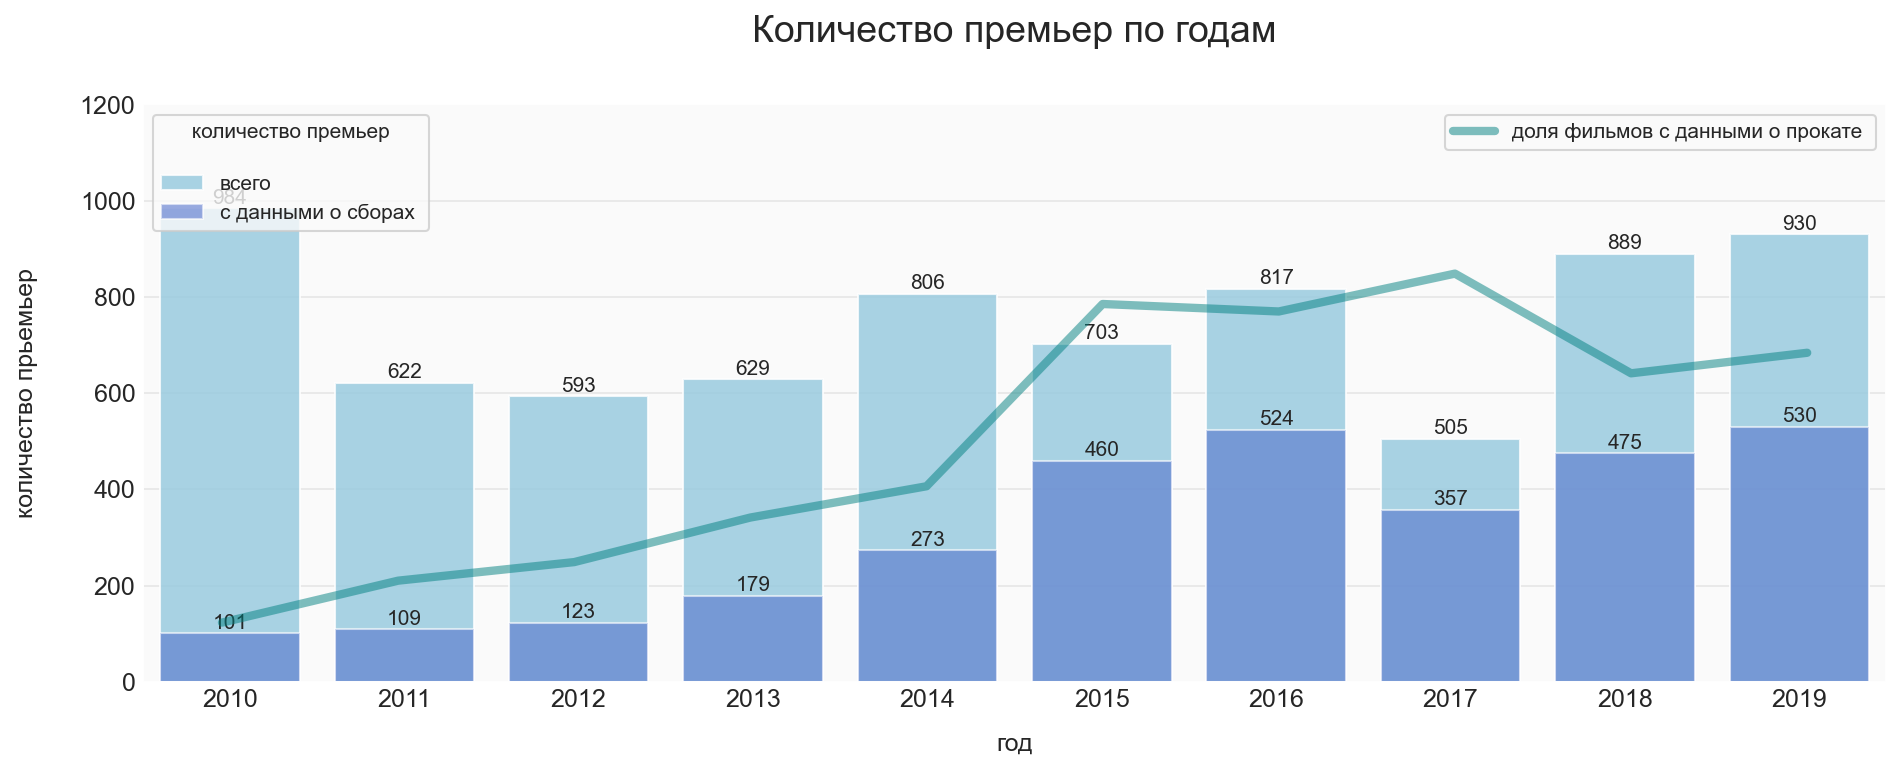

,prokat_year,total,has_box_office,has_box_office_part
0,2010,984,101,10%
1,2011,622,109,18%
2,2012,593,123,21%
3,2013,629,179,28%
4,2014,806,273,34%
5,2015,703,460,65%
6,2016,817,524,64%
7,2017,505,357,71%
8,2018,889,475,53%
9,2019,930,530,57%


In [49]:
fig, ax = plt.subplots(figsize=(15,5), dpi=plot_dpi)


# кол-во всех фильмов
sns.countplot(
              x=data['prokat_year'],
              color='skyblue',
              alpha=0.8,
             )


# кол-во фильмов с известной суммой сборов в прокате

sns.countplot(
              x=data.query('box_office > 0').prokat_year,
              color='royalblue',
              alpha=0.6,
             ) 
#доля фильмов с известной суммой сборов в прокате
ax2 = ax.twiny()
df = (
      data
      .groupby('prokat_year')
      .agg(total=('title','count'), has_box_office=('box_office','count'))
      .reset_index()
      .assign(has_box_office_part = lambda df: df.has_box_office / df.total)
     )
sns.lineplot(
             x=df.prokat_year,
             y=df.has_box_office_part*1200,
             color='teal',
             linewidth=4,
             alpha=0.5,
             ax=ax2,
            )


# тюнинг графиков

ax.set_ylim(0,1200)
ax.set_title('Количество премьер по годам', size=18, pad=30)
ax.set_xlabel('год', size=12, labelpad=10)
ax.set_ylabel('количество прьемьер', size=12, labelpad=20)
ax.tick_params(labelsize=12, length=0)
ax.legend(['всего', 'с данными о сборах '], title=' количество премьер \n', loc='upper left', fontsize=10, title_fontsize=10)

ax2.xaxis.set_major_locator(ticker.NullLocator())
ax2.set_xlabel('')
ax2.grid(False)
ax2.legend(['доля фильмов с данными о прокате '], title='', loc='upper right', fontsize=10, title_fontsize=10)

bar_annotate(ax)


space()
plt.show()

df.style.format('{:.0%}',subset='has_box_office_part')

Доля фильмов с данными о прокате постоянно растет, лишь в в конце периода отмечается ее снижение. Возможная причина: снижение популярности кинотеатров и рост доли фильмов, не использующих традиционный прокат.

В 2015 году виден резкий рост доли фильмов с данными о прокате. 2015-2017 годы выглядят аномальным всплеском. Возможно, это объясняется нехваткой каких-либо данных

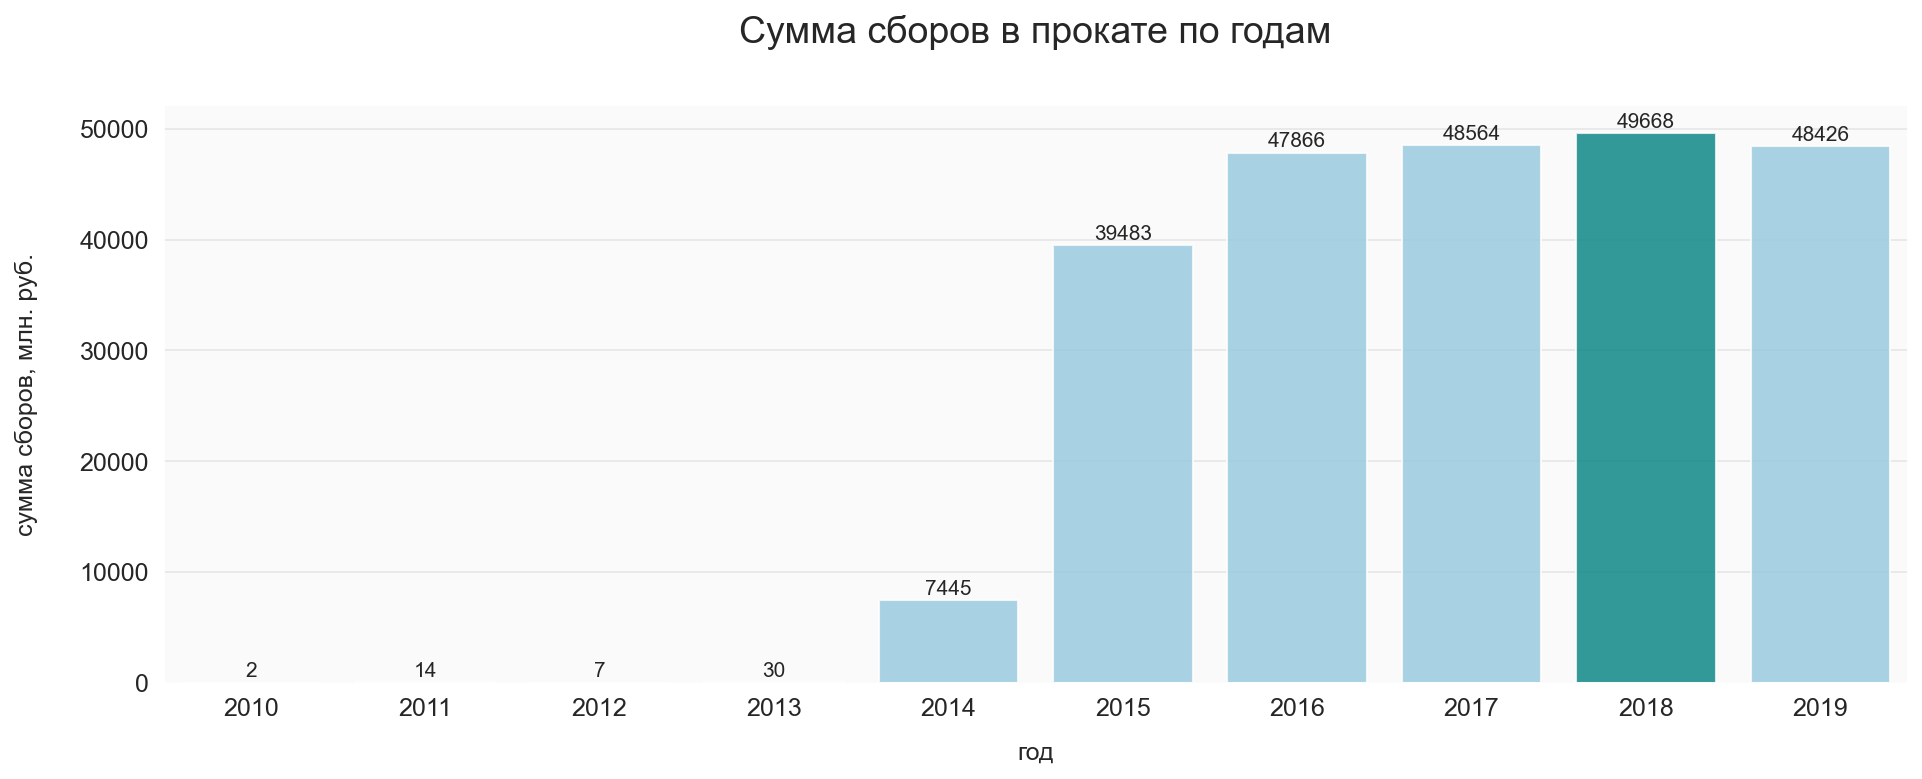

In [50]:
fig, ax = plt.subplots(figsize=(15,5), dpi=plot_dpi)


# подготовка данных

df = (
      data
      .groupby('prokat_year')
      .agg(box_office_total=('box_office','sum'))
      .reset_index()
     )


# график

sns.barplot(
            data=df,
            x='prokat_year',
            y='box_office_total',
            color='skyblue',
            alpha=0.8,
           )


# тюнинг графика

ax.set_title('Сумма сборов в прокате по годам', size=18, pad=30)
ax.set_xlabel('год', size=12, labelpad=10)
ax.set_ylabel('сумма сборов, млн. руб.', size=12, labelpad=20)
ax.tick_params(labelsize=12)

bar_annotate(ax)

for patch in ax.patches:
    if patch.get_height() == df.box_office_total.min() or patch.get_height() == df.box_office_total.max():
        patch.set_facecolor('teal')

space()
plt.show()

 2010–2014 годах суммы сборов были относительно небольшими. Вероятно, данные за эти годы являются неполными.

Начиная с конца 2014 года ситуация изменилась: прокатные сборы резко пошли в рост и в дальнейшем, 2016–2019 годы, оставались стабильными. Они еще не знали, что их ждет.

Наибольшие сборы были в 2018 году: 49668 млн. руб.
Наиболее слабый – 2012 год: 7 млн. руб. (что, конечно же, совсем непохоже на истину).

**Средняя и медианная сумма сборов для каждого**

In [51]:
data.pivot_table(index='prokat_year', values='box_office', aggfunc=['mean','median'])

,mean,median
,box_office,box_office
prokat_year,,
2010,0.024,0.002
2011,0.129,0.003
2012,0.057,0.006
2013,0.166,0.004
2014,27.271,0.020
2015,85.833,5.003
2016,91.347,3.958
2017,136.033,9.968


> Медианные сборы за любой год многократно ниже средних. Это свидетельствует о том, что присутствует аномально высокие значения: Средние значения могут быть искажены несколькими очень высокими сборами, в то время как медиана, которая представляет собой значение, делящее набор данных пополам, остается более стабильной. Так же стоит отметить, что  большинство сборов находятся на низком уровне, но есть только несколько очень успешных случаев из-за чего среднее значение будет выше медианного.

> Выделяются два периода: 2010–2013 (В данный период не было высоких сборов в отличии от периода 2015-2019 г.) и 2015–2019 годы, а также переходный 2014 год.

>В 2015–2019 годах сначала идет рост средних сборов, достигается максимум в середине периода, затем происходит спад. Медианные сборы почти повторяют динамику средних.

**Влияние возростного ограничения**

In [52]:
data.value_counts('age_restriction')

age_restriction
«16+» - для детей старше 16 лет           2845
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     810
«6+» - для детей старше 6 лет              626
dtype: int64

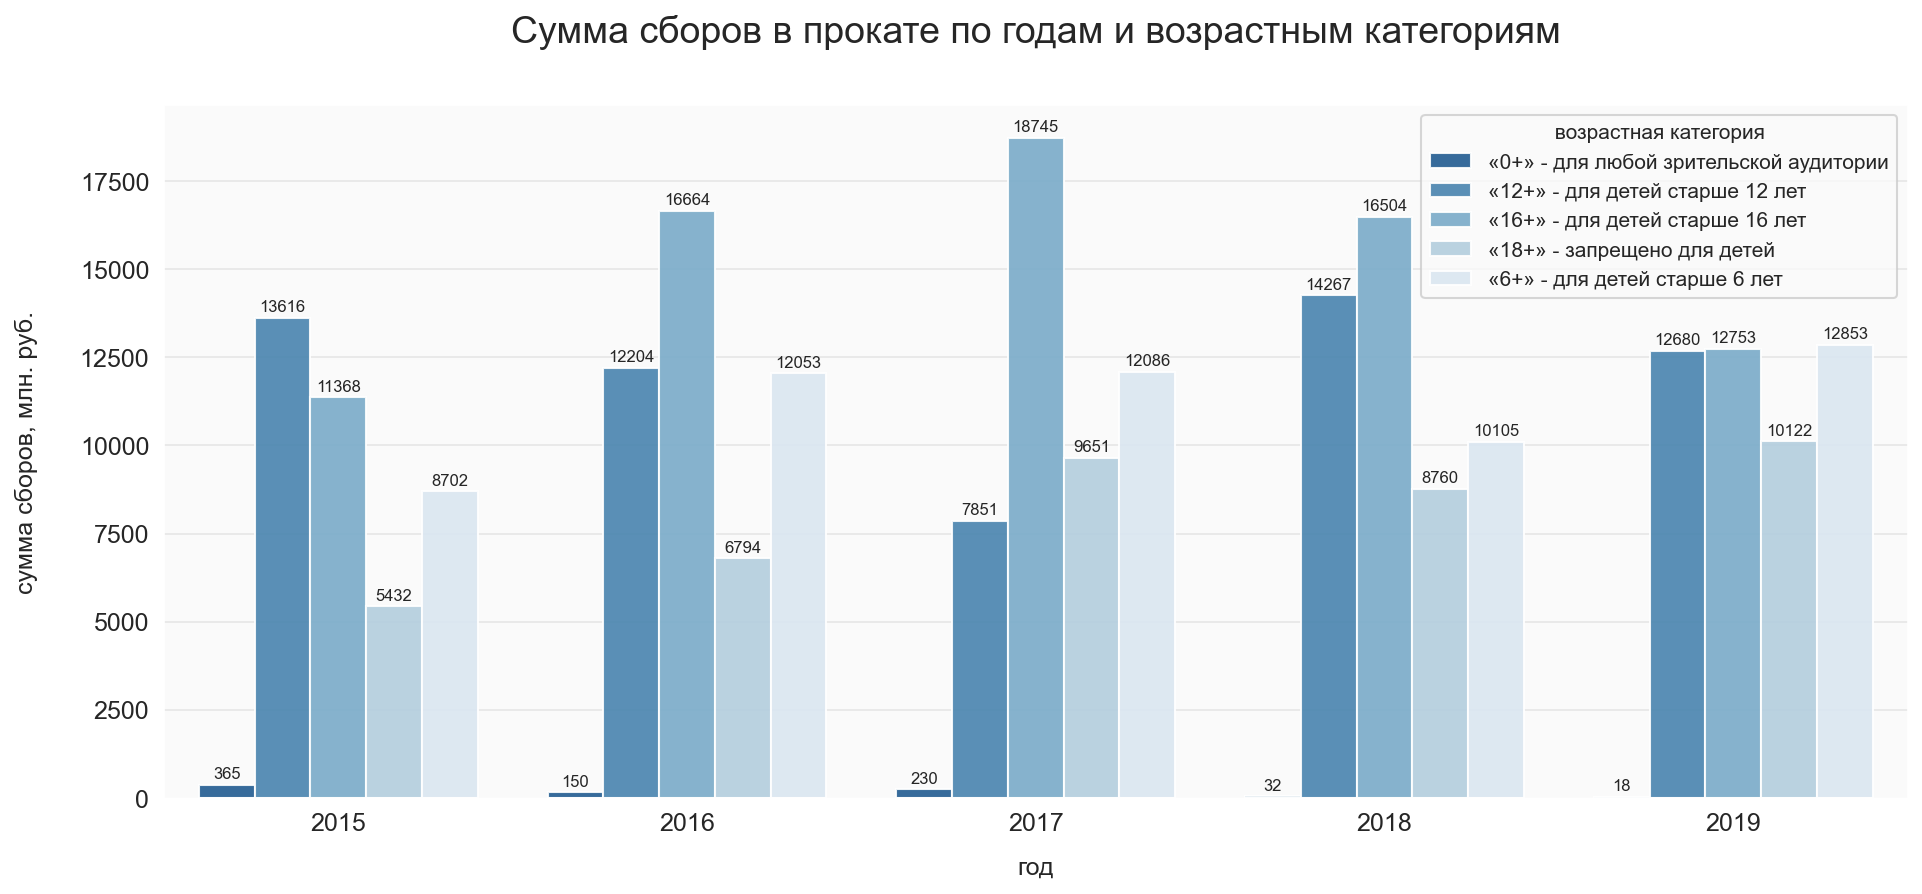

prokat_year,2015,2016,2017,2018,2019,All
age_restriction,,,,,,
«0+» - для любой зрительской аудитории,364.902082,150.228849,229.598930,32.449002,17.746067,794.924930
«12+» - для детей старше 12 лет,13616.082009,12204.446524,7851.427661,14267.291661,12680.198774,60619.446628
«16+» - для детей старше 16 лет,11368.068375,16664.216171,18745.042900,16503.602347,12753.418985,76034.348778
«18+» - запрещено для детей,5432.308367,6793.929819,9651.495581,8760.085501,10121.796304,40759.615572
«6+» - для детей старше 6 лет,8701.799371,12053.146008,12086.142146,10104.974623,12852.548651,55798.610800


In [53]:
fig, ax = plt.subplots(figsize=(15,6), dpi=plot_dpi)


# подготовка данных

df = (
      data
      .query('prokat_year >= 2015')
      .groupby(['prokat_year','age_restriction'])
      .agg(box_office_total=('box_office','sum'))
      .reset_index()
      .sort_values(['prokat_year','age_restriction'])
     )


# график

sns.barplot(
            data=df,
            x='prokat_year',
            y='box_office_total',
            hue='age_restriction',
            palette='Blues_r',
            alpha=0.9,
           )


# тюнинг графика

ax.set_title('Сумма сборов в прокате по годам и возрастным категориям', size=18, pad=30)
ax.set_xlabel('год', size=12, labelpad=10)
ax.set_ylabel('сумма сборов, млн. руб.', size=12, labelpad=20)
ax.tick_params(labelsize=12)
ax.legend(title=' возрастная категория ', loc='upper right', fontsize=10, title_fontsize=10)

bar_annotate(ax, font_size=8)


space()
plt.show()


# таблица

(
 data
 .query('prokat_year >= 2015')
 .pivot_table(index='age_restriction', columns='prokat_year', values='box_office', aggfunc='sum', margins=True)
 .head(-1)
 .style.highlight_max(color='lightgrey', axis=1, subset='All')
 .highlight_max(color='skyblue', subset='All')
)

**Вывод:**
С 2015 по 2019 год категория "16+" демонстрировала наибольшие прокатные сборы и оставалась самой востребованной.

В то же время, сборы в категории "0+" были крайне незначительными по сравнению с другими и к концу анализа стали практически незаметными.

В последний год наблюдений все категории, за исключением "0+", показали схожие результаты. Тем не менее, нельзя считать это устойчивой тенденцией, так как такое совпадение может быть случайным.

Что касается зависимости сборов от возрастных категорий:

- В категории "0+" сборы остаются на минимальном уровне и с течением времени эта ситуация усугубляется.

- Категория "16+" была наиболее популярна в 2016-2018 годах, но, возможно, её популярность подошла к концу.

- В категории "18+" наблюдается отставание по сравнению с другими (кроме "0+"), однако это отставание постепенно уменьшается.

Причины этих наблюдаемых тенденций могут заключаться в:

- строгих или невыгодных правилах присвоения рейтингов;

- изменении вкусов и потребностей аудитории.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

> Выше был построен график по иследованию фильмов с гос. поддержкой 
> Для распределений количества фильмов как с возвратной, так и невозвратной господдержкой характерны длинные значения. 
> Невозвратная поддержка оказывалась  втрое чаще.

> У 17 фильмов, имевших господдержку, не указан общий бюджет. 

In [54]:
data['support_total'] = data.nonrefundable_support + data.refundable_support

Доля кассовых сборов с поддержкой от общей суммы

In [55]:
data.query('support_total > 0')['box_office'].sum() / data['box_office'].sum()

0.17437931841788934

Доля кассовых сборов от всех фильмов

In [56]:
data.query('support_total > 0').shape[0] / data.shape[0]

0.04439689756619417

Сосчитаем окупаемость гос. поддержки

In [57]:
data['support_back'] = data['box_office'] / data['support_total']

In [58]:
source_columns = data.columns.to_list()     # список исходных полей датафрейма

(
 data
 .query('support_total > 0')
 .assign(support_count = lambda df: df.support_total.count())
 .assign(support_sum = lambda df: df.support_total.sum())
 .assign(budget_sum = lambda df: df.budget.sum())
 .assign(box_office_sum = lambda df: df.box_office.sum())
 .assign(support_back_mean = lambda df: df.support_back.mean())
 .assign(support_back_median = lambda df: df.support_back.median())
 .assign(support_back_min = lambda df: df.support_back.min())
 .assign(support_back_max = lambda df: df.support_back.max())
 .assign(support_back_overall = lambda df: df.box_office_sum / df.support_sum)
 .drop(source_columns, axis=1)
 .iloc[0]
 .to_frame()
 .T
 .reset_index(drop=True)
)

,support_count,support_sum,budget_sum,box_office_sum,support_back_mean,support_back_median,support_back_min,support_back_max,support_back_overall
0,332.000,20200.688,42240.266,42113.510,1.878,0.440,0.000,51.226,2.085


In [59]:
print('Количество фильмов неокупивших гос. поддержку:', data.query('support_back < 1').shape[0])

Количество фильмов неокупивших гос. поддержку: 200


In [60]:
print('Количество фильмов с окупаемостью гос. поддержки менее 10%:', data.query('support_back < 0.1').shape[0])

Количество фильмов с окупаемостью гос. поддержки менее 10%: 111


**Вывод:**
Суммарный бюджет всех фильмов практически в точности совпадает с кассовыми сборами. Не стоит забывать, что во входных данных по ряду фильмов отсутствуют или существенно занижены данные о бюджете и кассовых сборах.

Большая часть фильмов, 60%, не смогла окупить господдержку за счет кассовых сборов даже без учета частного финансирования, а каждый третий не смог окупить хотя бы 10% вложений.

Медианная окупаемость господдержки даже без учета частных инвестиций всего 44%.

48% составляет доля господдержки в общем бюджете всех фильмов, получивших ее

**Отношение окупаемости к другим признакам**

In [61]:
def support_info(field: str):
    
    return (
            data
            .query('support_total > 0')
            .groupby(field)
            .agg(
                 support_count=('support_total','count'),
                 support_sum=('support_total','sum'),
                 budget_sum = ('budget', 'sum'),
                 box_office_sum=('box_office','sum'),
                 support_back_mean=('support_back','mean'),
                 support_back_median=('support_back','median'),
                 support_back_min=('support_back','min'),
                 support_back_max=('support_back','max'),
                )
            .assign(support_back_overall = lambda df: df.box_office_sum / df.support_sum)
            .fillna(0)
            .sort_values('support_sum', ascending=False)
           )

In [62]:
support_info('prokat_year').sort_index()

,support_count,support_sum,budget_sum,box_office_sum,support_back_mean,support_back_median,support_back_min,support_back_max,support_back_overall
prokat_year,,,,,,,,,
2013,2,134.348,255.435,20.322,0.099,0.099,0.014,0.185,0.151
2014,16,572.002,1279.485,1017.422,1.564,0.163,0.001,13.111,1.779
2015,86,3656.241,7309.669,5785.285,1.354,0.183,0.000,17.623,1.582
2016,61,4303.155,7228.943,6081.708,1.279,0.324,0.000,12.121,1.413
2017,41,3183.972,6972.173,10865.075,3.063,1.310,0.007,21.119,3.412
2018,56,3446.969,6651.695,9934.069,2.371,0.784,0.002,21.115,2.882
2019,70,4904.000,12542.867,8409.627,2.131,0.469,0.003,51.226,1.715


По таблице наблюдаем объем ежегодных вложений в 2017-18 годах, где произошло снижение  господдержки. Окупаемость в эти же годы наоборот выросла.

In [63]:
support_info('type')


,support_count,support_sum,budget_sum,box_office_sum,support_back_mean,support_back_median,support_back_min,support_back_max,support_back_overall
type,,,,,,,,,
художественный,300,17627.199,36966.812,36490.216,1.791,0.289,0.000,51.226,2.070
анимационный,31,2570.489,5240.454,5623.293,2.708,1.416,0.010,17.623,2.188
документальный,1,3.000,33.000,0.000,0.000,0.000,0.000,0.000,0.000


Художественные фильмы являются самыми популярными у гос. поддержки 

Научно-популярным', музыкально-развлекательным и "'прочим" фильмы не участвуют в гос. поддержке

Стоит отметить, что о купаемость анимационных фильмов  значительно равномернее, чем художественных.

In [64]:
support_info('genres_main')

,support_count,support_sum,budget_sum,box_office_sum,support_back_mean,support_back_median,support_back_min,support_back_max,support_back_overall
genres_main,,,,,,,,,
драма,93,5314.407,11051.887,9490.844,1.022,0.127,0.000,12.621,1.786
комедия,74,3218.283,5915.587,12479.977,3.313,0.960,0.002,51.226,3.878
мультфильм,31,2461.520,5285.499,5622.014,2.707,1.416,0.002,17.623,2.284
фантастика,11,1406.000,2193.101,1718.204,1.320,1.384,0.006,4.153,1.222
фэнтези,11,1032.900,2340.124,995.837,0.791,0.441,0.000,3.603,0.964
история,4,1020.000,2145.062,1455.468,1.104,1.249,0.230,1.687,1.427
триллер,15,769.645,1290.961,700.450,0.693,0.123,0.002,4.704,0.910
приключения,7,696.000,3374.742,1205.597,4.793,1.887,0.012,21.119,1.732
не указано,16,688.969,942.961,1481.749,1.194,0.019,0.001,17.009,2.151


Самые популярный жанр у гос. поддержки - драмы и комедии.

Лидеры окупаемости – спорт, биография и комедии.

In [65]:
support_info('age_restriction')

,support_count,support_sum,budget_sum,box_office_sum,support_back_mean,support_back_median,support_back_min,support_back_max,support_back_overall
age_restriction,,,,,,,,,
«12+» - для детей старше 12 лет,106,7799.394,15251.946,19957.964,2.697,0.671,0.000,51.226,2.559
«16+» - для детей старше 16 лет,125,5569.053,11513.592,7658.463,1.434,0.194,0.001,21.115,1.375
«6+» - для детей старше 6 лет,65,5546.374,12320.906,13383.992,2.017,0.902,0.005,17.623,2.413
«18+» - запрещено для детей,28,1012.347,2250.837,560.159,0.550,0.059,0.000,3.798,0.553
«0+» - для любой зрительской аудитории,8,273.520,902.985,552.933,1.773,1.612,0.002,4.478,2.022


In [66]:
support_info('director_name').head(10)

,support_count,support_sum,budget_sum,box_office_sum,support_back_mean,support_back_median,support_back_min,support_back_max,support_back_overall
director_name,,,,,,,,,
ф.бондарчук,2,750.000,944.000,1038.321,4.153,4.153,4.153,4.153,1.384
н.хомерики,3,660.000,883.705,618.143,1.688,1.124,0.186,3.753,0.937
а.кравчук,1,500.000,980.000,717.703,1.435,1.435,1.435,1.435,1.435
р.давлетьяров,5,459.848,770.430,299.263,0.486,0.185,0.086,1.661,0.651
а.мизгирев,1,450.000,684.201,364.285,0.810,0.810,0.810,0.810,0.810
н.лебедев,1,442.104,635.284,1402.255,3.172,3.172,3.172,3.172,3.172
а.мегердичев,1,400.000,590.192,2779.686,6.949,6.949,6.949,6.949,6.949
д.дьяченко,4,351.000,780.695,2404.899,6.679,4.313,1.539,16.550,6.852
а.цицилин,3,350.000,852.163,530.326,2.073,1.544,0.197,4.478,1.515


In [67]:
print('Количество режиссеров, неокупивших господдержку:', support_info('director_name').query('support_back_overall < 1').shape[0])

Количество режиссеров, неокупивших господдержку: 184


In [68]:
print('Количество режиссеров с окупаемостью господдержки менее 10%:', support_info('director_name').query('support_back_overall < 0.1').shape[0])

Количество режиссеров с окупаемостью господдержки менее 10%: 107


Наиболее финансово обеспеченным режиссером с государственной поддержкой является Бондарчук. В этом вряд ли кто-то сомневается. Его собственные вложения едва ли покрывают бюджет, и складывается впечатление, что государственные субсидии практически исчезли.

Тем временем, следующий в списке, Хомерика  также несет убытки — его фильмы полностью проваливаются в прокате. 

В общем, среди режиссеров, даже с учетом государственных вложений, **184** не смогли вернуть средства, выделенные из бюджета, а **107** из них не достигли даже 10%-ного уровня окупаемости.

### Шаг 5. Напишите общий вывод

**Проведенная работа**

В данном исследовании были изучены данные, опубликованные на портале открытых данных Министерства культуры, включая информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

Оценено качество этих данных. Выполнена проверка на пропуски, ошибки и дубликаты. Проведена работа по улучшению качества входных данных: коррекция типов данных, исправление ошибок, удаление дубликатов, добавление новых полей.

Даны рекомендации по результатам исследования. Определены потенциальные риски и возможности их устранения. Даны рекомендации по дальнейшему развитию исследования.

**Результаты работы**

После анализа полноты и надежности предоставленной информации можно выделить основной недостаток: сведения о бюджете фильма и его кассовых сборах неполные, а в некоторых случаях и недостоверные. Это значительно снижает качество исследования. Попытка восстановить эти данные с помощью расчетов, скорее всего, не приведет к улучшению исследования и может даже ухудшить его. 

Также стоит отметить почти полное отсутствие ключевых данных до 2015 года, что значительно ограничивает период анализа.

Наиболее финансово обеспеченным режиссером с государственной поддержкой является Бондарчук. В этом вряд ли кто-то сомневается. Его собственные вложения едва ли покрывают бюджет, и складывается впечатление, что государственные субсидии практически исчезли.

Тем временем, следующий в списке, Хомерика также несет убытки — его фильмы полностью проваливаются в прокате.

В общем, среди режиссеров, даже с учетом государственных вложений, 184 не смогли вернуть средства, выделенные из бюджета, а 107 из них не достигли даже 10%-ного уровня окупаемости.

Самые популярный жанр у гос. поддержки - драмы и комедии.

Лидеры окупаемости – спорт, биография и комедии.

Суммарный бюджет всех фильмов практически в точности совпадает с кассовыми сборами. Не стоит забывать, что во входных данных по ряду фильмов отсутствуют или существенно занижены данные о бюджете и кассовых сборах.

Большая часть фильмов, 60%, не смогла окупить господдержку за счет кассовых сборов даже без учета частного финансирования, а каждый третий не смог окупить хотя бы 10% вложений.

Медианная окупаемость господдержки даже без учета частных инвестиций всего 44%.

48% составляет доля господдержки в общем бюджете всех фильмов, получивших ее.

С 2015 по 2019 год категория "16+" демонстрировала наибольшие прокатные сборы и оставалась самой востребованной.

В то же время, сборы в категории "0+" были крайне незначительными по сравнению с другими и к концу анализа стали практически незаметными.

В последний год наблюдений все категории, за исключением "0+", показали схожие результаты. Тем не менее, нельзя считать это устойчивой тенденцией, так как такое совпадение может быть случайным.

Что касается зависимости сборов от возрастных категорий:

- В категории "0+" сборы остаются на минимальном уровне и с течением времени эта ситуация усугубляется.

- Категория "16+" была наиболее популярна в 2016-2018 годах, но, возможно, её популярность подошла к концу.

- В категории "18+" наблюдается отставание по сравнению с другими (кроме "0+"), однако это отставание постепенно уменьшается.

Причины этих наблюдаемых тенденций могут заключаться в:

- строгих или невыгодных правилах присвоения рейтингов;

- изменении вкусов и потребностей аудитории.